# Volume & Trade Frequency Analysis During Fear vs Greed Phases

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the merged data
df = pd.read_csv('merged_data.csv')

# Display first few rows
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


## Analyze Trading Volume Across Different Market Sentiments

C:\Users\br04a\AppData\Local\Temp\ipykernel_92708\3557157607.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_volume = df.groupby(['Date', 'Sentiment_Category']).agg({


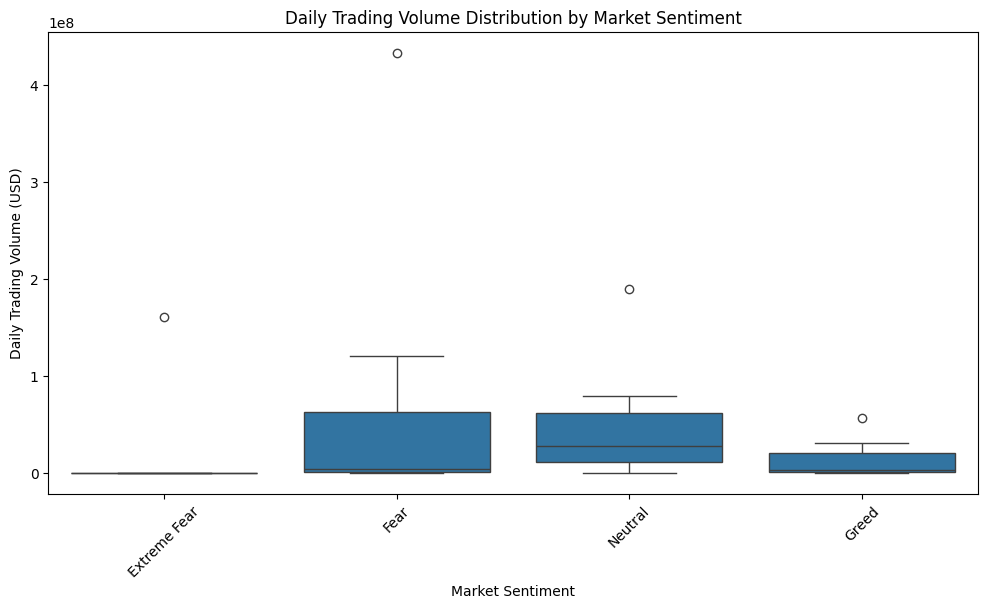

In [7]:
# Create sentiment categories
df['Sentiment_Category'] = pd.cut(df['value'], 
                                  bins=[0, 25, 50, 75, 100],
                                  labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])

# Calculate daily volume metrics
df['Date'] = pd.to_datetime(df['Timestamp'])
daily_volume = df.groupby(['Date', 'Sentiment_Category']).agg({
    'Size USD': 'sum',
    'Trade ID': 'count'  # Count of trades
}).reset_index()

# Plot daily trading volume by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_volume, x='Sentiment_Category', y='Size USD')
plt.title('Daily Trading Volume Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Daily Trading Volume (USD)')
plt.xticks(rotation=45)
plt.show()

## Analyze Trade Frequency

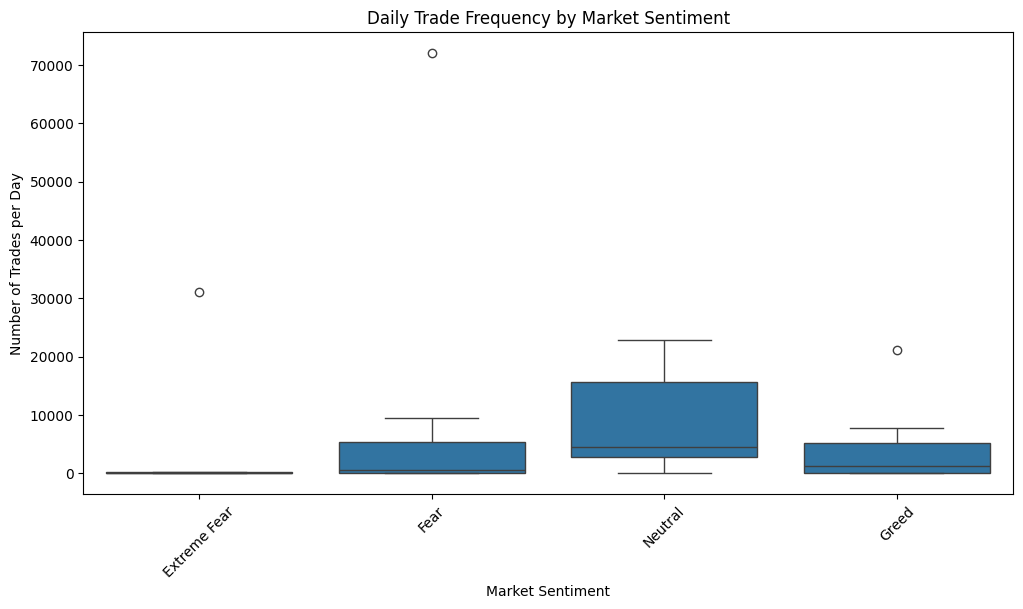

In [8]:
# Plot trade frequency by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_volume, x='Sentiment_Category', y='Trade ID')
plt.title('Daily Trade Frequency by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades per Day')
plt.xticks(rotation=45)
plt.show()

## Time Series Analysis of Volume and Sentiment

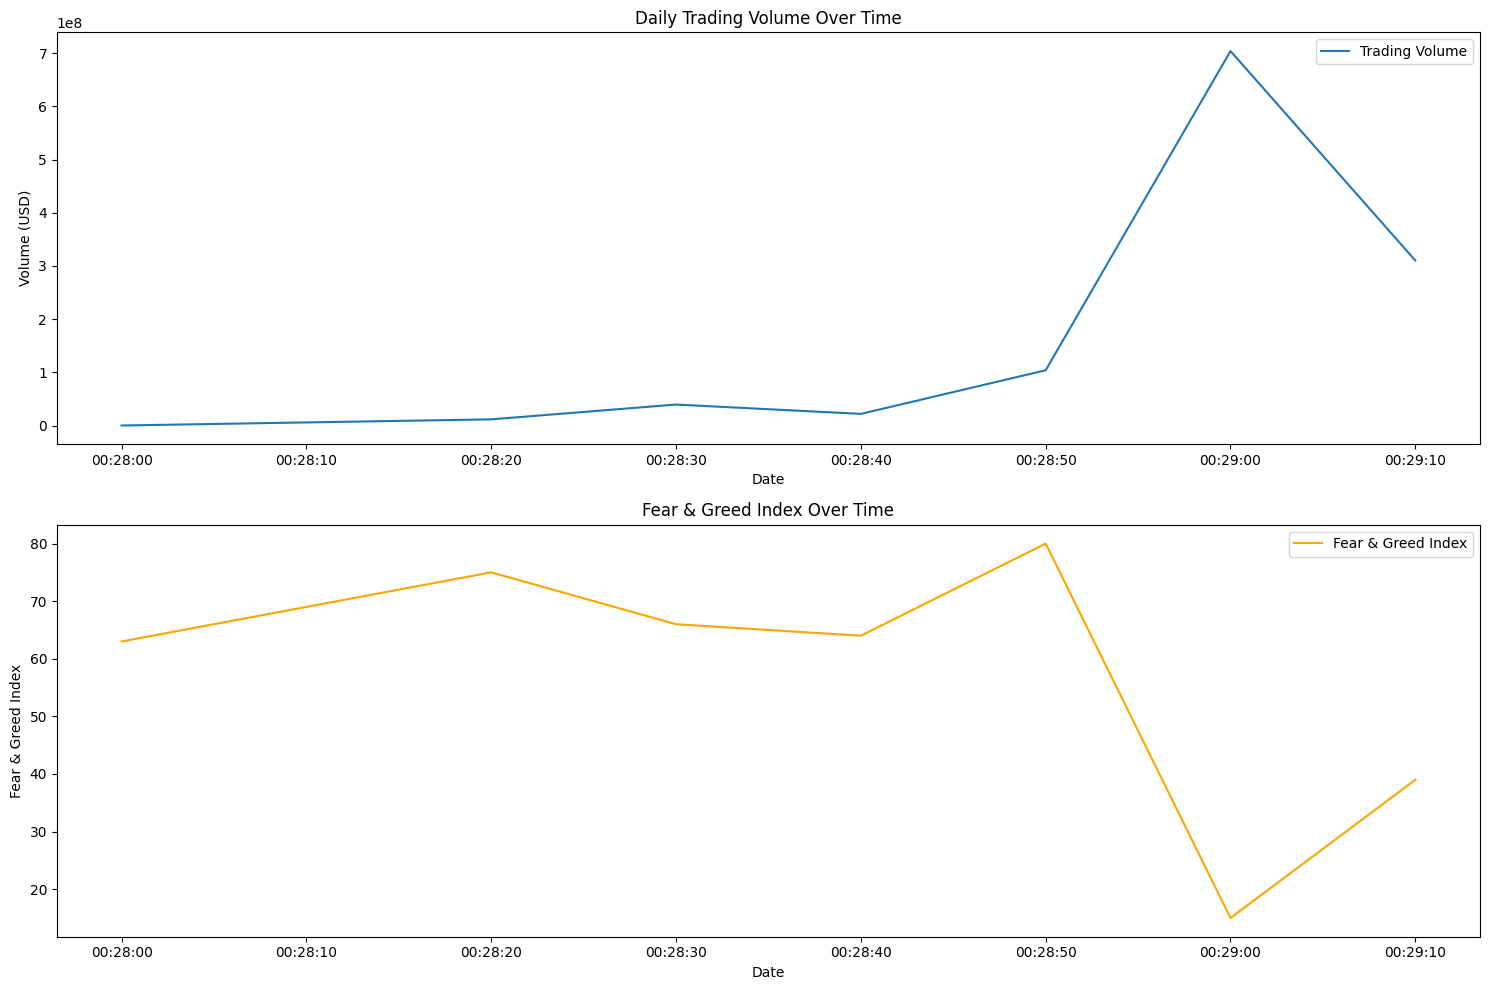

In [9]:
# Calculate moving averages
daily_metrics = df.groupby('Date').agg({
    'Size USD': 'sum',
    'Trade ID': 'count',
    'value': 'first'
}).reset_index()

# Plot time series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Volume plot
ax1.plot(daily_metrics['Date'], daily_metrics['Size USD'], label='Trading Volume')
ax1.set_title('Daily Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume (USD)')
ax1.legend()

# Sentiment plot
ax2.plot(daily_metrics['Date'], daily_metrics['value'], label='Fear & Greed Index', color='orange')
ax2.set_title('Fear & Greed Index Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Fear & Greed Index')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
# Calculate correlations
corr_volume = daily_metrics['Size USD'].corr(daily_metrics['value'])
corr_frequency = daily_metrics['Trade ID'].corr(daily_metrics['value'])

print(f'Correlation between Trading Volume and Fear & Greed Index: {corr_volume:.2f}')
print(f'Correlation between Trade Frequency and Fear & Greed Index: {corr_frequency:.2f}')

Correlation between Trading Volume and Fear & Greed Index: -0.92
Correlation between Trade Frequency and Fear & Greed Index: -0.81
